In [36]:
import qiskit as qs

In [37]:
qs.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

In [38]:
%matplotlib inline

In [39]:
# Create a 2 qubit quantum register
quant_reg = qs.QuantumRegister(2)

In [40]:
# Create a 2 bit classical register
# Measurements are taken from this register
class_reg = qs.ClassicalRegister(2)

In [41]:
# Create a quantum circuit from the above registers
quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

In [42]:
# Have a look at the quantum circuit
quant_circuit.draw()

q8_0: 
      
q8_1: 
      
c2: 2/

In [43]:
# Add Hadamard gate to circuit
quant_circuit.h(quant_reg[0])

In [44]:
# Redraw the citcuit to see the new gate
quant_circuit.draw()

┌───┐
q8_0: ┤ H ├
      └───┘
q8_1: ─────
           
c2: 2/═════

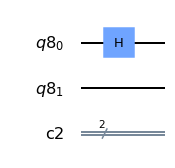

In [45]:
# Draw the circuit with some better visuals
quant_circuit.draw(output = 'mpl')

In [46]:
# Add a controlled x gate to the other quantum register to create entanglement between the two quantum registers
# This is a controlled-Not gate 
quant_circuit.cx(quant_reg[0], quant_reg[1])

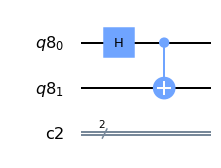

In [47]:
# Draw the circuit with some better visuals
quant_circuit.draw(output = 'mpl')

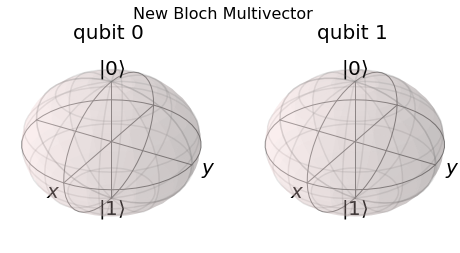

In [35]:
# Plot BLoch Spheres for both of the quantum registers in the circuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(quant_circuit)
plot_bloch_multivector(state, title="New Bloch Multivector")

In [13]:
quant_circuit.measure(quant_reg, class_reg)

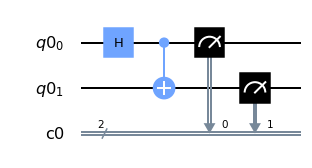

In [14]:
quant_circuit.draw(output = 'mpl')

Measurements are added to the classical registers.  The quantum registers have to decohere to be measured, and that information is placed into the classical registers.  I don't think the simulation supports going back to the quantum registers after decoherence.

In [15]:
# Instantiate the simulator to run the circuit
# Qasm is quantum assembly language
qasm_sim = qs.Aer.get_backend('qasm_simulator')

In [17]:
# Execute the circuit using the qasm simulator above
# Store the results
quant_circuit_results = qs.execute(quant_circuit, backend = qasm_sim).result()

In [21]:
# Check the counts from the simulation of the circuit
quant_circuit_results.get_counts()

{'00': 513, '11': 511}

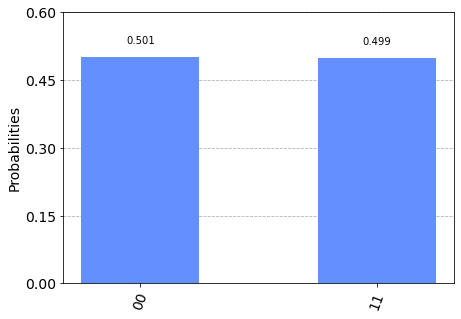

In [22]:
# Import the plot_histogram function so the results of the circuit can be seen
from qiskit.tools.visualization import plot_histogram

# Check the results of the simulation using the plot_histogram function
plot_histogram(quant_circuit_results.get_counts())

Keep in mind that this is a limited number of shots (hence the small amount of error between the two - not 50/50)

On a real device, which can be really noisy, the numbers will be different and there will be all values in between.  So, the results will include: [00, 01, 10, 11]